In [2]:
from datetime import datetime
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the credentials
def load_credentials(file_path):
    credentials = {}
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespaces
            # Skip empty lines or lines that don't contain an "="
            if not line or "=" not in line:
                continue
            key, value = line.split("=", 1)  # Split only at the first "="
            credentials[key] = value
    return credentials

credentials_file = ".env"  # Update with the correct file path
credentials = load_credentials(credentials_file)

FileNotFoundError: [Errno 2] No such file or directory: '.env'

In [ ]:
db_user = credentials['USER']
db_password = credentials['PASSWORD']
db_host = credentials['HOST']
db_port = credentials['PORT']
db_name = credentials['DATABASE']

In [ ]:
table_name = "084072023"

engine = create_engine(
    f'mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
)

with engine.connect() as connection:
    df = pd.read_sql_table(table_name, connection, index_col="time")
    df = df[df.index >= df.index[-1] - pd.DateOffset(years=1)]

In [ ]:
pest_min = 9
pest_max = 45
pest_total = 760
pest_hum = 65

In [ ]:
day_degrees = []
for day_min, day_max in zip(df['daily_min_temp'].values, df['daily_max_temp'].values):
    t_min = max(day_min, pest_min)
    t_max = min(day_max, pest_max)
    day_degree = max(0, ((t_min + t_max) / 2) - pest_min)
    day_degrees.append(day_degree)
df['day_degree'] = day_degrees

In [ ]:
gens = []
cumulative = 0
for day_degree in df['day_degree'].values:
    cumulative = cumulative + day_degree
    gen = cumulative / pest_total
    gens.append(gen)
df['gen'] = gens

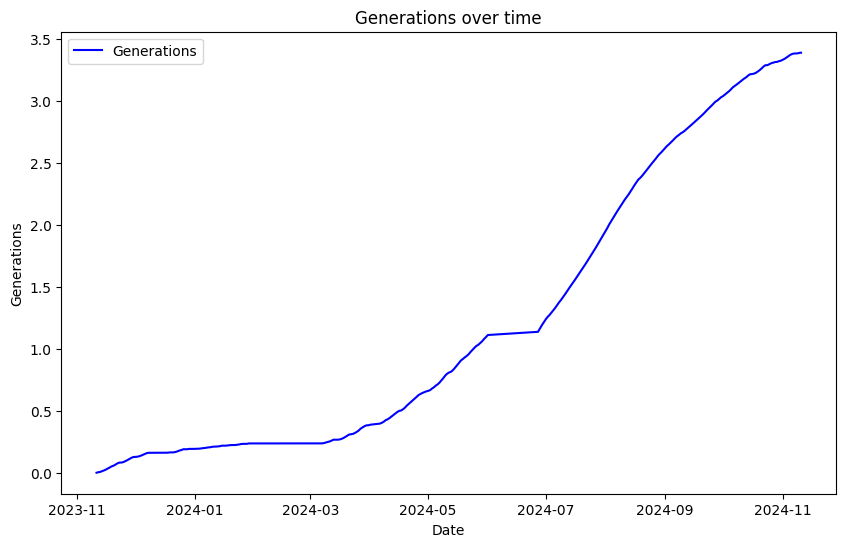

In [ ]:
# Plotting the 'day_degree' column against the index (or another column, like 'date')
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['gen'], label='Generations', color='b')

# Adding labels and title
plt.xlabel('Date')  # or you can use 'Index' if the index represents dates
plt.ylabel('Generations')
plt.title('Generations over time')
plt.legend()

# Show the plot
plt.show()

In [ ]:
adj_day_degrees = []
for day_hum, day_degree in zip(df['daily_avg_hum'].values, df['day_degree'].values):
    alpha = np.exp(-(((day_hum - pest_hum) / 30) ** 2))
    adj_day_degree = day_degree * alpha
    adj_day_degrees.append(adj_day_degree)
df['adj_day_degree'] = adj_day_degrees

In [ ]:
adj_gens = []
cumulative = 0
for adj_day_degree in df['adj_day_degree'].values:
    cumulative = cumulative + adj_day_degree
    adj_gen = cumulative / pest_total
    adj_gens.append(adj_gen)
df['adj_gen'] = adj_gens

In [ ]:
df

,week,daily_min_temp,daily_max_temp,daily_avg_hum,daily_avg_temp,day_degree,gen,adj_day_degree,adj_gen
time,,,,,,,,,
2023-11-11 00:00:00,45,1.71,16.17,67.85,7.39,3.585,0.004717,3.552791,0.004675
2023-11-12 00:00:00,46,3.05,15.34,64.62,8.15,3.170,0.008888,3.169491,0.008845
2023-11-13 00:00:00,46,0.44,13.41,81.58,5.69,2.205,0.011789,1.624641,0.010983
2023-11-14 00:00:00,46,-0.45,18.05,75.52,6.24,4.525,0.017743,4.001425,0.016248
2023-11-15 00:00:00,46,-1.08,18.24,36.15,11.57,4.620,0.023822,1.832336,0.018659
...,...,...,...,...,...,...,...,...,...
2024-11-10 00:00:00,45,-0.62,15.24,80.26,5.51,3.120,3.389401,2.408710,3.044068
2024-11-10 10:52:30,45,-0.92,NaN,NaN,NaN,0.000,3.389401,NaN,NaN
2024-11-10 10:52:30,45,NaN,17.16,NaN,NaN,0.000,3.389401,NaN,NaN


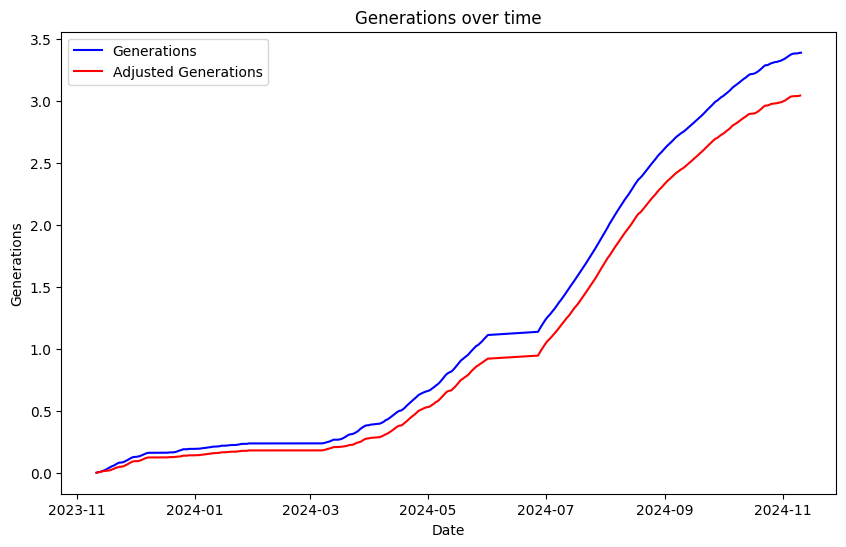

In [ ]:
# Plotting the 'day_degree' column against the index (or another column, like 'date')
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['gen'], label='Generations', color='b')
plt.plot(df.index, df['adj_gen'], label='Adjusted Generations', color='r')

# Adding labels and title
plt.xlabel('Date')  # or you can use 'Index' if the index represents dates
plt.ylabel('Generations')
plt.title('Generations over time')
plt.legend()

# Show the plot
plt.show()

In [ ]:
df['divided_gen'] = df['gen'] % 1
df['divided_adj_gen'] = df['adj_gen'] % 1

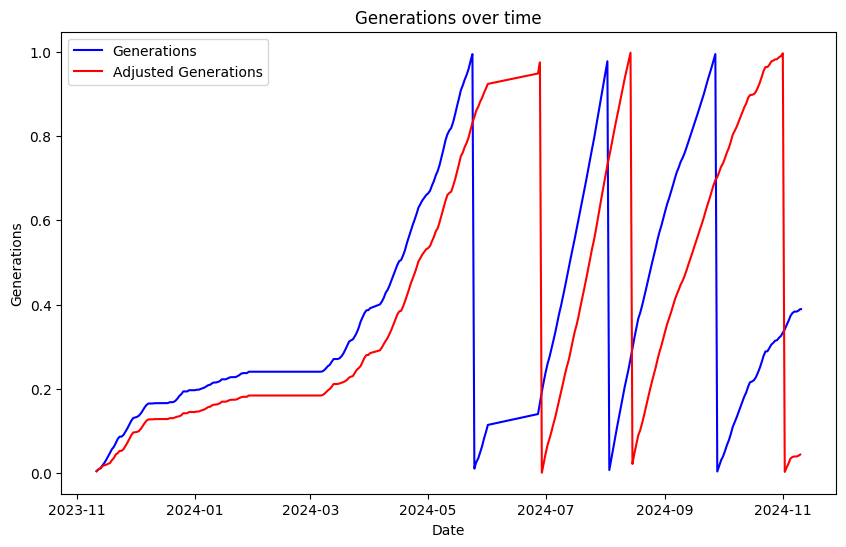

In [ ]:
# Plotting the 'day_degree' column against the index (or another column, like 'date')
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['divided_gen'], label='Generations', color='b')
plt.plot(df.index, df['divided_adj_gen'], label='Adjusted Generations', color='r')

# Adding labels and title
plt.xlabel('Date')  # or you can use 'Index' if the index represents dates
plt.ylabel('Generations')
plt.title('Generations over time')
plt.legend()

# Show the plot
plt.show()